In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, confusion_matrix

In [30]:
data = pd.read_csv('data/DARPA/dataset_ground_truth.csv', names=['Label'])
data

,Label
0,0
1,0
2,0
3,0
4,1
...,...
61728,1
61729,1
61730,1
61731,1


In [31]:
data['Label'].value_counts(normalize=True)

1    0.544377
0    0.455623
Name: Label, dtype: float64

In [32]:
"""data = pd.read_csv('data/DARPA/dataset_v2.txt', sep=" ", names=['timestamp','source_ID','destination_ID', 'Label'])
data"""

'data = pd.read_csv(\'data/DARPA/dataset_v2.txt\', sep=" ", names=[\'timestamp\',\'source_ID\',\'destination_ID\', \'Label\'])\ndata'

In [33]:
len(data)

61733

In [34]:
"""
data['Label'].to_csv('data/DARPA/dataset_ground_truth.csv', index=False, header=False)
dataset_processed=data[['source_ID','destination_ID']].copy()
dataset_processed['timestamp']=data['timestamp']
dataset_processed.to_csv('data/DARPA/dataset_processed.csv', index=False, header=False)
"""

"\ndata['Label'].to_csv('data/DARPA/dataset_ground_truth.csv', index=False, header=False)\ndataset_processed=data[['source_ID','destination_ID']].copy()\ndataset_processed['timestamp']=data['timestamp']\ndataset_processed.to_csv('data/DARPA/dataset_processed.csv', index=False, header=False)\n"

In [35]:
y_pred  = pd.read_csv('temp/Score.txt', sep=" ", names=['Prediction'])
y_pred

,Prediction
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,6.250000
...,...
61728,472855.468750
61729,531003.312500
61730,592522.125000
61731,1546.025269


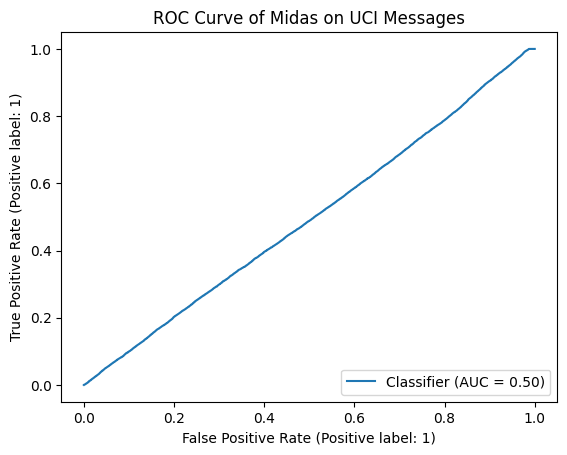

In [36]:
data_true=data[-len(y_pred):] #only select data that are predicted (after tsetup)
RocCurveDisplay.from_predictions(data['Label'], y_pred['Prediction'])
plt.title('ROC Curve of Midas on UCI Messages')
#plt.plot([0,1], [0,1])
plt.show()

In [37]:
fpr, tpr, thresholds = roc_curve(data_true['Label'], y_pred['Prediction'], pos_label = 1)

In [38]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 134.4434 with G-Mean: 0.4946
FPR: 0.4945, TPR: 0.484


In [39]:
data['Prediction'] = np.where(y_pred['Prediction']<thresholdOpt, 0, 1)

data['Prediction'].value_counts()

0    31557
1    30176
Name: Prediction, dtype: int64

In [40]:
confusion_matrix(data['Label'], data['Prediction'])

array([[14217, 13910],
       [17340, 16266]])

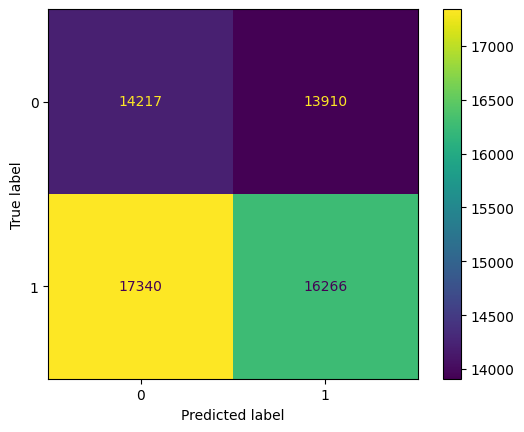

In [41]:
ConfusionMatrixDisplay.from_predictions(data['Label'], data['Prediction'])

In [42]:
TPR=2348710/(387504+2348710)
FPR= 66218/(1594228+ 66218)
print(f'TPR {TPR}')
print(f'FPR {FPR}')

TPR 0.8583794980948127
FPR 0.039879646793692776
